# Определение перспективного тарифа для телеком-компании

В компании «Мегалайн» — федерального оператора сотовой связи, клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Нам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В нашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

## Изучение данных из файлов

In [1]:
import pandas as pd

In [2]:
#откроем файл с данными и изучим общую информацию
df_calls = pd.read_csv('/datasets/calls.csv') #Таблица calls (информация о звонках)
df_internet = pd.read_csv('/datasets/internet.csv', index_col=0) #Таблица internet (информация об интернет-сессиях)
df_messages = pd.read_csv('/datasets/messages.csv') #Таблица messages (информация о сообщениях)
df_tariffs = pd.read_csv('/datasets/tariffs.csv') #Таблица tariffs (информация о тарифах)
df_users = pd.read_csv('/datasets/users.csv') #Таблица users (информация о пользователях)

### Таблица df_calls

In [3]:
df_calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [4]:
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


**Пропусков в данных у нас нет, изменим только тип данных для одного столбца.**

In [5]:
#так как это дата, то приведем тип данных к datetime.
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format='%Y-%m-%d')

**Округлим значения в столбце duration в большую сторону до целых минут**

In [6]:
import numpy as np

In [7]:
df_calls['duration'] = np.ceil(df_calls['duration'])

In [8]:
df_calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.0,1000
1,1000_1,2018-08-17,0.0,1000
2,1000_2,2018-06-11,3.0,1000
3,1000_3,2018-09-21,14.0,1000
4,1000_4,2018-12-15,6.0,1000


### Таблица df_internet

In [9]:
df_internet.head()

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


In [10]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB


**Пропусков в данных у нас также нет, изменим только тип данных для одного столбца.**

In [11]:
#так как это дата, то приведем тип данных к datetime.
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], format='%Y-%m-%d')

In [12]:
df_internet.head()

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


### Таблица df_messages

In [13]:
df_messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [14]:
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


**Пропусков нет, меняем тип данных для даты.**

In [15]:
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'], format='%Y-%m-%d')

### Таблица df_tariffs

In [16]:
df_tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


**Изменил название столбца, чтобы дальше внизу было проще мержить**

In [17]:
df_tariffs.columns = ['messages_included', 'mb_per_month_included', 'minutes_included', 'rub_monthly_fee', 'rub_per_gb', 'rub_per_message', 'rub_per_minute', 'tariff']

In [18]:
df_tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff                   2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


**Здесь все в порядке**

### Таблица df_users

In [19]:
df_users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [20]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


**Мы наблюдаем много пропусков в столбце churn_date(дата прекращения пользования тарифом) - это скорее всего означает, что тариф ещё действовал на момент выгрузки данных. Снова изменим только тип данных в столбцах с датами**

In [21]:
df_users['churn_date'] = pd.to_datetime(df_users['churn_date'], format='%Y-%m-%d')
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'], format='%Y-%m-%d')

## Подготовка данных

### Посчитаем для каждого пользователя количество сделанных звонков и израсходованных минут разговора по месяцам

In [22]:
df_calls['month'] = pd.DatetimeIndex(df_calls['call_date']).month #поместим время в класс DatetimeIndex и применим атрибут month

In [23]:
df_calls_pivot = df_calls.pivot_table(index=['user_id','month'], values='duration', aggfunc=('sum', 'count')) #создадим сводную таблицу

In [24]:
df_calls_pivot.head(10)

count    sum
user_id month              
1000    5         22  159.0
        6         43  172.0
        7         47  340.0
        8         52  408.0
        9         58  466.0
        10        57  350.0
        11        43  338.0
        12        46  333.0
1001    11        59  430.0
        12        63  414.0

In [25]:
df_calls_pivot.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3174 entries, (1000, 5) to (1499, 12)
Data columns (total 2 columns):
count    3174 non-null int64
sum      3174 non-null float64
dtypes: float64(1), int64(1)
memory usage: 62.9 KB


### Посчитаем для каждого пользователя количество отправленных сообщений по месяцам

In [26]:
df_messages['month'] = pd.DatetimeIndex(df_messages['message_date']).month

In [27]:
df_messages_pivot = df_messages.pivot_table(index=['user_id','month'], values='id', aggfunc='count')

In [28]:
df_messages_pivot.head(10)                   

id
user_id month    
1000    5      22
        6      60
        7      75
        8      81
        9      57
        10     73
        11     58
        12     70
1002    6       4
        7      11

In [29]:
df_messages_pivot.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2717 entries, (1000, 5) to (1499, 12)
Data columns (total 1 columns):
id    2717 non-null int64
dtypes: int64(1)
memory usage: 32.7 KB


### Посчитаем для каждого пользователя объем израсходованного интернет-трафика по месяцам

In [30]:
df_internet['month'] = pd.DatetimeIndex(df_internet['session_date']).month

In [31]:
df_internet.head()

,id,mb_used,session_date,user_id,month
0,1000_0,112.95,2018-11-25,1000,11
1,1000_1,1052.81,2018-09-07,1000,9
2,1000_2,1197.26,2018-06-25,1000,6
3,1000_3,550.27,2018-08-22,1000,8
4,1000_4,302.56,2018-09-24,1000,9


In [32]:
df_internet_pivot = df_internet.pivot_table(index=['user_id','month'], values='mb_used', aggfunc='sum')

In [33]:
df_internet_pivot.head(10)                      

mb_used
user_id month          
1000    5       2253.49
        6      23233.77
        7      14003.64
        8      14055.93
        9      14568.91
        10     14702.49
        11     14756.47
        12      9817.61
1001    11     18429.34
        12     14036.66

**Теперь переведем в ГБ, и округлим в большую сторону**

In [34]:
df_internet_pivot['mb_used'] = df_internet_pivot['mb_used'] / 1024

In [35]:
df_internet_pivot.head()

mb_used
user_id month           
1000    5       2.200674
        6      22.689229
        7      13.675430
        8      13.726494
        9      14.227451

**Так как в правилах компании есть такое условие : "Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.", то гигабайты потраченного трафика в месяц, округляем в большую сторону**

In [36]:
df_internet_pivot['mb_used'] = np.ceil(df_internet_pivot['mb_used'])

In [37]:
df_internet_pivot.head()

mb_used
user_id month         
1000    5          3.0
        6         23.0
        7         14.0
        8         14.0
        9         15.0

In [38]:
df_internet_pivot = df_internet_pivot.rename(columns={'mb_used':'gb_used'})

In [39]:
df_internet_pivot.head()

gb_used
user_id month         
1000    5          3.0
        6         23.0
        7         14.0
        8         14.0
        9         15.0

### Посчитаем помесячную выручку с каждого пользователя (вычтем бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножим на значение из тарифного плана; прибавим абонентскую плату, соответствующую тарифному плану).

In [40]:
df_calls_pivot = df_calls_pivot.reset_index()

In [41]:
df_messages_pivot = df_messages_pivot.reset_index()

In [42]:
df_internet_pivot = df_internet_pivot.reset_index()

**Сначала смержил все сводные таблицы с данными по звонкам, интернету и сообщениям**

In [43]:
pivot_table = df_calls_pivot.merge(df_messages_pivot, on=['user_id', 'month'], how='outer')

In [44]:
pivot_table = pivot_table.merge(df_internet_pivot, on=['user_id', 'month'], how='outer')

In [45]:
pivot_table.head()

,user_id,month,count,sum,id,gb_used
0,1000,5,22.0,159.0,22.0,3.0
1,1000,6,43.0,172.0,60.0,23.0
2,1000,7,47.0,340.0,75.0,14.0
3,1000,8,52.0,408.0,81.0,14.0
4,1000,9,58.0,466.0,57.0,15.0


**Затем смержил готовую таблицу с данными с таблицей "пользователи"**

In [46]:
df_users_pivot_table = df_users.merge(pivot_table, on='user_id', how='outer')

In [47]:
df_users_pivot_table.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month,count,sum,id,gb_used
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5.0,22.0,159.0,22.0,3.0
1,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,6.0,43.0,172.0,60.0,23.0
2,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,7.0,47.0,340.0,75.0,14.0
3,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,8.0,52.0,408.0,81.0,14.0
4,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,9.0,58.0,466.0,57.0,15.0


**И наконец смержил с данными по тарифам**

In [48]:
df_users_pivot_table_global = df_users_pivot_table.merge(df_tariffs, on='tariff', how='outer')

In [49]:
df_users_pivot_table_global.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month,count,sum,id,gb_used,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5.0,22.0,159.0,22.0,3.0,1000,30720,3000,1950,150,1,1
1,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,6.0,43.0,172.0,60.0,23.0,1000,30720,3000,1950,150,1,1
2,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,7.0,47.0,340.0,75.0,14.0,1000,30720,3000,1950,150,1,1
3,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,8.0,52.0,408.0,81.0,14.0,1000,30720,3000,1950,150,1,1
4,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,9.0,58.0,466.0,57.0,15.0,1000,30720,3000,1950,150,1,1


In [50]:
df_users_pivot_table_global.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 20 columns):
user_id                  3216 non-null int64
age                      3216 non-null int64
churn_date               189 non-null datetime64[ns]
city                     3216 non-null object
first_name               3216 non-null object
last_name                3216 non-null object
reg_date                 3216 non-null datetime64[ns]
tariff                   3216 non-null object
month                    3214 non-null float64
count                    3174 non-null float64
sum                      3174 non-null float64
id                       2717 non-null float64
gb_used                  3203 non-null float64
messages_included        3216 non-null int64
mb_per_month_included    3216 non-null int64
minutes_included         3216 non-null int64
rub_monthly_fee          3216 non-null int64
rub_per_gb               3216 non-null int64
rub_per_message          3216 non-null int64
rub_per

**Заполнил пропущенные значения нулем**

In [51]:
df_users_pivot_table_global = df_users_pivot_table_global.fillna(0)

In [52]:
df_users_pivot_table_global.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 20 columns):
user_id                  3216 non-null int64
age                      3216 non-null int64
churn_date               3216 non-null object
city                     3216 non-null object
first_name               3216 non-null object
last_name                3216 non-null object
reg_date                 3216 non-null datetime64[ns]
tariff                   3216 non-null object
month                    3216 non-null float64
count                    3216 non-null float64
sum                      3216 non-null float64
id                       3216 non-null float64
gb_used                  3216 non-null float64
messages_included        3216 non-null int64
mb_per_month_included    3216 non-null int64
minutes_included         3216 non-null int64
rub_monthly_fee          3216 non-null int64
rub_per_gb               3216 non-null int64
rub_per_message          3216 non-null int64
rub_per_minute

**Это столбцы с разницами**

In [53]:
df_users_pivot_table_global['residual_calls'] = df_users_pivot_table_global['sum'] - df_users_pivot_table_global['minutes_included']

In [54]:
df_users_pivot_table_global['residual_messages'] = df_users_pivot_table_global['id'] - df_users_pivot_table_global['messages_included']

In [55]:
df_users_pivot_table_global['residual_internet'] = df_users_pivot_table_global['gb_used'] - (df_users_pivot_table_global['mb_per_month_included'] / 1024)

In [56]:
df_users_pivot_table_global.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month,count,...,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,residual_calls,residual_messages,residual_internet
0,1000,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5.0,22.0,...,1000,30720,3000,1950,150,1,1,-2841.0,-978.0,-27.0
1,1000,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,6.0,43.0,...,1000,30720,3000,1950,150,1,1,-2828.0,-940.0,-7.0
2,1000,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,7.0,47.0,...,1000,30720,3000,1950,150,1,1,-2660.0,-925.0,-16.0
3,1000,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,8.0,52.0,...,1000,30720,3000,1950,150,1,1,-2592.0,-919.0,-16.0
4,1000,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,9.0,58.0,...,1000,30720,3000,1950,150,1,1,-2534.0,-943.0,-15.0


In [57]:
pd.set_option('display.max_columns',None)

In [58]:
df_users_pivot_table_global[['residual_calls','residual_messages','residual_internet']] = df_users_pivot_table_global[['residual_calls','residual_messages','residual_internet']].clip(lower=0)

In [59]:
df_users_pivot_table_global.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month,count,sum,id,gb_used,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,residual_calls,residual_messages,residual_internet
0,1000,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5.0,22.0,159.0,22.0,3.0,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0
1,1000,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,6.0,43.0,172.0,60.0,23.0,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0
2,1000,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,7.0,47.0,340.0,75.0,14.0,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0
3,1000,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,8.0,52.0,408.0,81.0,14.0,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0
4,1000,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,9.0,58.0,466.0,57.0,15.0,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0


**Создаю столбец income, где просто каждую разницу умножаю на значение тарифного плана, и складываю их вместе(3 штуки всего), ну и затем прибавляю к ним абонентскую плату**

In [60]:
df_users_pivot_table_global['income'] = (df_users_pivot_table_global['residual_calls'] * df_users_pivot_table_global['rub_per_minute']) + (df_users_pivot_table_global['residual_messages'] * df_users_pivot_table_global['rub_per_message']) + (df_users_pivot_table_global['residual_internet'] * df_users_pivot_table_global['rub_per_gb']) + df_users_pivot_table_global['rub_monthly_fee']

In [61]:
df_users_pivot_table_global.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month,count,sum,id,gb_used,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,residual_calls,residual_messages,residual_internet,income
0,1000,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5.0,22.0,159.0,22.0,3.0,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0,1950.0
1,1000,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,6.0,43.0,172.0,60.0,23.0,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0,1950.0
2,1000,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,7.0,47.0,340.0,75.0,14.0,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0,1950.0
3,1000,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,8.0,52.0,408.0,81.0,14.0,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0,1950.0
4,1000,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,9.0,58.0,466.0,57.0,15.0,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0,1950.0


## Проанализируем данные
Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? Посчитаем среднее количество, дисперсию и стандартное отклонение.

### Проанализируем данные для звонков

In [62]:
import matplotlib.pyplot as plt

In [63]:
import numpy as np

**Создал две таблицы, с данными только по тарифу ultra и smart отдельно**

In [64]:
df_users_pivot_table_global_ultra = df_users_pivot_table_global.query('tariff == "ultra"')

In [65]:
df_users_pivot_table_global_smart = df_users_pivot_table_global.query('tariff == "smart"')

In [66]:
df_users_pivot_table_global_ultra['sum'].mean()

526.0892494929006

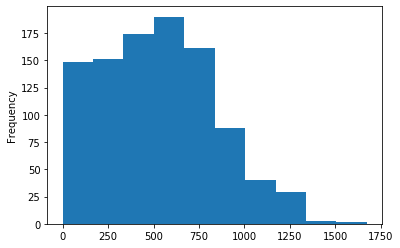

In [67]:
df_users_pivot_table_global_ultra['sum'].plot(kind='hist')

**В среднем требуется около 550 минут разговора в месяц, пользователям тарифа ultra.**

In [68]:
df_users_pivot_table_global_smart['sum'].mean()

417.747533632287

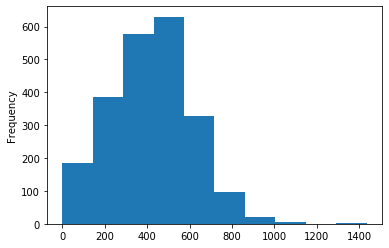

In [69]:
df_users_pivot_table_global_smart['sum'].plot(kind='hist')

**В среднем требуется около 420 минут разговора  в месяц, пользователям тарифа smart.**

In [70]:
variance_calls_ultra = np.var(df_users_pivot_table_global_ultra['sum'])

In [71]:
variance_calls_ultra

100950.00623331097

In [72]:
standart_deviation_calls_ultra = np.std(df_users_pivot_table_global_ultra['sum'])

In [73]:
standart_deviation_calls_ultra

317.72630711559117

**Нашли дисперсию и стандартное отклонение для звонков(в минутах) в тарифе ultra.**

In [74]:
variance_calls_smart = np.var(df_users_pivot_table_global_smart['sum'])

In [75]:
variance_calls_smart

36265.12415310985

In [76]:
standart_deviation_calls_smart = np.std(df_users_pivot_table_global_smart['sum'])

In [77]:
standart_deviation_calls_smart

190.4340414765959

**Нашли дисперсию и стандартное отклонение для звонков(в минутах) в тарифе smart.**

**Попробую сделать вывод, что раз стандартное отклонение в тарифе ultra выше, то пользователи этого тарифа расходуют свои минуты сильно по-разному, кто-то очень много, и напротив кто-то значительно меньше.**

### Проанализируем данные для сообщений

In [78]:
df_users_pivot_table_global_ultra['id'].mean()

49.31338742393509

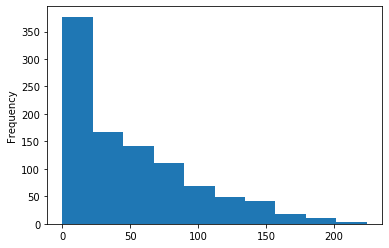

In [79]:
df_users_pivot_table_global_ultra['id'].plot(kind='hist')

**В среднем требуется около 40 сообщений в месяц, пользователям тарифа ultra.**

In [80]:
df_users_pivot_table_global_smart['id'].mean()

33.36905829596412

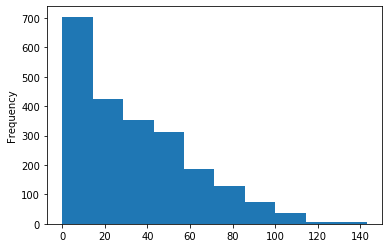

In [81]:
df_users_pivot_table_global_smart['id'].plot(kind='hist')

**В среднем требуется около 30 сообщений в месяц, пользователям тарифа smart.**

In [82]:
variance_messages_ultra = np.var(df_users_pivot_table_global_ultra['id'])

In [83]:
variance_messages_ultra

2283.0995570851965

In [84]:
standart_deviation_messages_ultra = np.std(df_users_pivot_table_global_ultra['id'])

In [85]:
standart_deviation_messages_ultra

47.781791061922284

**Нашли дисперсию и стандартное отклонение для сообщений в тарифе ultra.**

In [86]:
variance_messages_smart = np.var(df_users_pivot_table_global_smart['id'])

In [87]:
variance_messages_smart

796.5978766916688

In [88]:
standart_deviation_messages_smart = np.std(df_users_pivot_table_global_smart['id'])

In [89]:
standart_deviation_messages_smart

28.224065559229217

**Нашли дисперсию и стандартное отклонение для сообщений в тарифе smart.**

**Можно сделать вывод, что пользователи тарифа ultra отправляют значительно больше сообщений.**

### Проанализируем данные для интернет-трафика

In [90]:
df_users_pivot_table_global_ultra['gb_used'].mean()

19.474645030425965

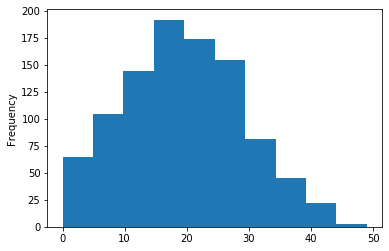

In [91]:
df_users_pivot_table_global_ultra['gb_used'].plot(kind='hist')

**В среднем требуется около 37 гигабайт трафика в месяц, пользователям тарифа ultra.**

In [92]:
df_users_pivot_table_global_smart['gb_used'].mean()

16.32152466367713

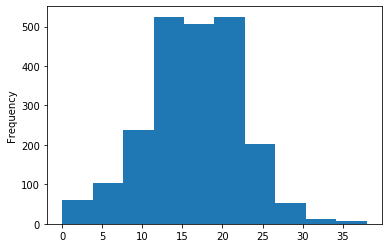

In [93]:
df_users_pivot_table_global_smart['gb_used'].plot(kind='hist')

**В среднем требуется около 42 гигабайт трафика в месяц, пользователям тарифа smart.**

In [94]:
variance_internet_ultra = np.var(df_users_pivot_table_global_ultra['gb_used'])

In [95]:
variance_internet_ultra

97.27978308900674

In [96]:
standart_deviation_internet_ultra = np.std(df_users_pivot_table_global_ultra['gb_used'])

In [97]:
standart_deviation_internet_ultra

9.863051408616236

**Нашли дисперсию и стандартное отклонение для интернет-трафика в тарифе ultra.**

In [98]:
variance_internet_smart = np.var(df_users_pivot_table_global_smart['gb_used'])

In [99]:
variance_internet_smart

33.11859498481772

In [100]:
standart_deviation_internet_smart = np.std(df_users_pivot_table_global_smart['gb_used'])

In [101]:
standart_deviation_internet_smart

5.754875757548352

**Нашли дисперсию и стандартное отклонение для интернет-трафика в тарифе smart.**

**Похоже на то, что пользователи обоих тарифов расходуют трафик с похожим стандартным отклоенением при близких средних значениях, скорее всего в обоих тарифах абоненты расходуют трафик примерно одинаково**

## Проверка гипотезы

### Сначала проверим нулевую гипотезу о том, что средняя выручка пользователей тарифов «Ультра» и «Смарт»  не различаются.

In [102]:
from scipy import stats as st

In [103]:
alpha = 0.05
results_df_users_pivot_table_global = st.ttest_ind(df_users_pivot_table_global_ultra['income'], df_users_pivot_table_global_smart['income'])
print('p-значение:', results_df_users_pivot_table_global.pvalue)
if results_df_users_pivot_table_global.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 8.081909555489933e-161
Отвергаем нулевую гипотезу


**Судя по данным средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются, и мы отвергаем нулевую гипотезу**

### Теперь проверим нулевую гипотезу о том, что средняя выручка пользователей из Москвы  и выручка пользователей из других регионов -  не различаются.

**Сначала создам две таблицы, для Москвы и для регионов**

In [104]:
df_users_pivot_table_global_Moscow = df_users_pivot_table_global.query('city == "Москва"')
df_users_pivot_table_global_region = df_users_pivot_table_global.query('"Москва" not in city')

In [105]:
alpha = 0.05
results = st.ttest_ind(df_users_pivot_table_global_Moscow['income'], df_users_pivot_table_global_region['income'])
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.5400751614511182
Не получилось отвергнуть нулевую гипотезу


**Не удалось показать, что выручки пользователей из Москвы отличаются от выручки пользователей из других регионов. Не получилось отвергнуть нулевую гипотезу**

## Вывод

**На основе проведенного анализа, можно сделать выводы, что средняя выручка пользователей не зависит от региона проживания, выручка в Москве не больше чем в других городах. Также можно сделать вывод, что выручка компании по тарифу "Ультра" - выше, чем по тарифу "Смарт".
Можно подвести итог, что абоненты тарифа ultra в среднем в месяц расходуют больше минут на разговоры и отправляют большее количество смс, чем абоненты тарифа smart, и только интернет-трафик абоненты обоих тарифов расходуют примерно одинаково.
Так тариф ultra лучше для компании, выручка от него выше.**